# Проект

## Описание проекта ##

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных

### 1 часть

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### 2 часть

Файл /datasets/orders.csv :
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv :
- date — дата;
- group — группа A/B-теста;
-visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Работа с данными

In [21]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [24]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

In [25]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [48]:
orders = pd.read_csv('/datasets/orders.csv')

In [49]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [50]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [51]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [52]:
orders.duplicated().sum()

0

In [53]:
visitors.duplicated().sum()

0

In [54]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [55]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [56]:
a = orders.groupby('visitorId').count().reset_index()
a = a[a['group'] == 2]

l = a['visitorId']

In [57]:
orders = orders.groupby('visitorId').agg({'group':'nunique'})
orders

,group
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


### Вывод

Можно сказать, что данные чистые, дубликатов нет, пропущенных значений тоже, есть данные которые пересекаются, то есть люди входят в одну и в другую группу. Можем приступать к анализу дальше.

## Приоритизация гипотез.

Рассчитаем ICE для гипотез.

In [17]:
data['ICE'] = (data['Impact']*data['Confidence']) / data['Efforts']

In [18]:
data.sort_values(by='ICE', ascending=False).round()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Видим, что по ICE наиболее перспективные гипотезы: 9,1 ("Запустить акцию, дающую скидку на товар в день рождения" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей")

Рассчитаем RICE для гипотез.

In [19]:
data['RICE'] = (data['Reach']*data['Impact']*data['Confidence'])/data['Efforts']

In [20]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


In [21]:
data.sort_values(by='RICE', ascending=False).style.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3333,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33333,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


Видим, что по RICE наиболее перспективные гипотезы: 8,3 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа")

### Вывод

Приоритизация гипотез поменялась из-за того, что у 8 и 3 гипотез очень большое значение у параметра Reach, что значит, что эти гипотезы затронут много людей. Предлагаю проверить именно их ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа")

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам.

In [22]:
datesGroup = orders[['date', 'group']].drop_duplicates()

In [23]:
ordersAggregated = datesGroup.apply(lambda x : orders[np.logical_and(orders['date'] <= x['date'], orders['group']==x['group'])].agg({
    'date':'max',
    'group' : 'max',
    'transactionId': pd.Series.nunique,
    'visitorId' : pd.Series.nunique,
    'revenue':'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
visitorsAggregated = datesGroup.apply(lambda x : visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])].agg({
    'date':'max',
    'group':'max',
    'visitors':'sum'
}), axis=1).sort_values(by=['date', 'group'])

In [25]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

In [26]:
cumulativeData

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,21,18,126097,719
1,2019-08-01,B,19,18,82717,713
2,2019-08-02,A,37,33,174270,1338
3,2019-08-02,B,40,39,239878,1294
4,2019-08-03,A,61,57,286743,1845
...,...,...,...,...,...,...
57,2019-08-29,B,533,497,5121197,17708
58,2019-08-30,A,486,447,3426013,18037
59,2019-08-30,B,555,518,5332420,18198
60,2019-08-31,A,496,455,3484996,18736


In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId']]

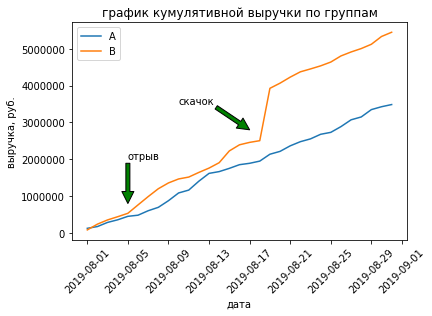

In [28]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.legend()
plt.xticks(rotation=45)
plt.title('график кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('выручка, руб.')
plt.show()

#### Вывод

На протяжении всего теста сегмент В показывал результаты лучше, чем сегмент А, в конце c явным отрывом группа В лидировала.

### Построим график кумулятивного среднего чека по группам.

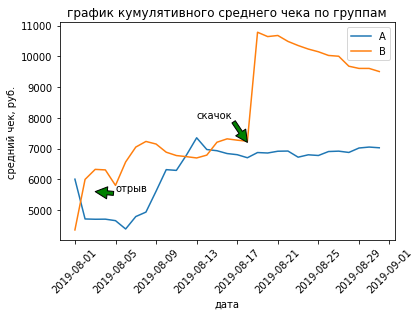

In [29]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'],label='B')

plt.annotate('скачок', xy=('2019-08-18', 7200), xytext=('2019-08-13', 8000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-03', 5600), xytext=('2019-08-05', 5600),
            arrowprops=dict(facecolor='g')) 
plt.legend()
plt.xticks(rotation=45)
plt.title('график кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('средний чек, руб.')

plt.xticks(rotation=45)
plt.show()

#### Вывод

Кумулятивное значение среднего чека колеблется, но в конце теста как будто группа В вышла в лидеры, скорее всего стоит проверить выбросы

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [30]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on = 'date', how = 'left',suffixes=['A', 'B'])

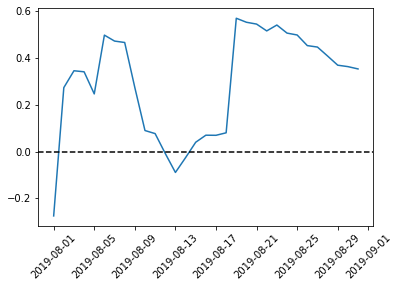

In [31]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionIdB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionIdA'])-1)

plt.axhline(y=0,color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

#### Вывод

В паре мест метрика очень сильно меняется, скорее всего, в эти даты были совершены аномальные заказы

### Построим график кумулятивной конверсии по группам. 

In [32]:
cumulativeData['conversion'] = cumulativeData['transactionId']/cumulativeData['visitors']

In [33]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

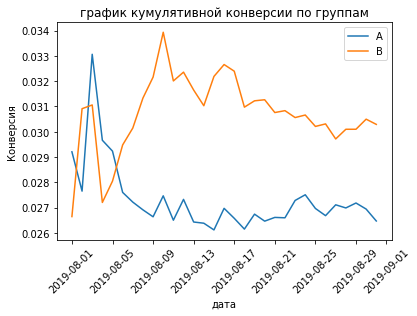

In [34]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('график кумулятивной конверсии по группам')
plt.xlabel('дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.show()


#### Вывод

Изначально группа А имела большую конверсию, но после сегмент В стабилизировался в среднем значении, большем чем у группы А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A','B'])

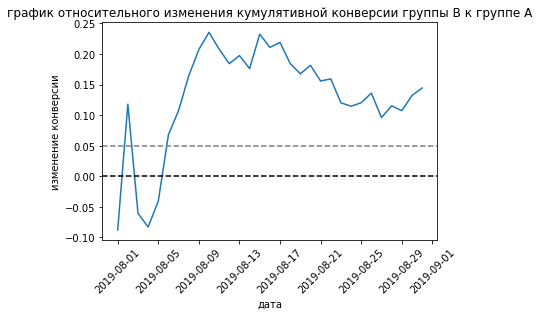

In [36]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black',linestyle='--')
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('дата')
plt.ylabel('изменение конверсии')
plt.xticks(rotation=45)
plt.show()

### Построим точечный график количества заказов по пользователям. 

In [37]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
                .groupby('visitorId', as_index=False)\
                .agg({'transactionId':pd.Series.nunique})\
                .sort_values('transactionId', ascending=False)\
                .rename(columns = {'transactionId' :'orders'})

In [38]:
ordersByUsers

,visitorId,orders
960,4256040402,11
561,2458001652,11
540,2378935119,9
462,2038680547,8
846,3717692402,5
...,...,...
330,1426761187,1
331,1430210707,1
332,1438226485,1
333,1452540367,1


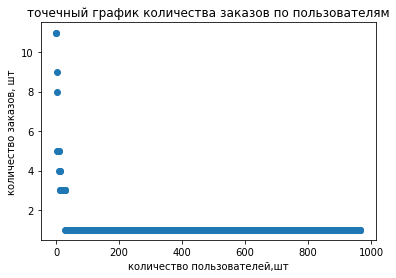

In [39]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('точечный график количества заказов по пользователям')
plt.xlabel('количество пользователей,шт')
plt.ylabel('количество заказов, шт')
plt.show()

Пользователей, совершивших >2 заказов - мало, скорее всего, это аномалия.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [40]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1.  , 1.  , 4.34])

#### Вывод

Не более 5 пользователей совершили 2 заказа, не более 1% - более 5.

### Построим точечный график стоимостей заказов.

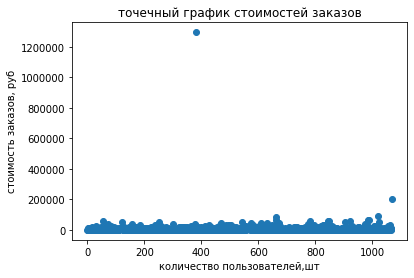

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('точечный график стоимостей заказов')
plt.xlabel('количество пользователей,шт')
plt.ylabel('стоимость заказов, руб')
plt.show()

#### Вывод

Очень малозначительное количество заказов более 200000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [42]:
np.percentile(orders['revenue'], [90,95,99])

array([18286. , 27831. , 57152.4])

#### Вывод

Не более, чем у 5 процентов заказы дороже 28000, и не более. чем у 1 процента - более 58000.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

In [44]:
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [45]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

In [46]:
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


In [47]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

In [48]:
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


In [49]:

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

In [50]:
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [51]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

In [52]:
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


In [53]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

In [54]:
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [55]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

In [56]:
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [57]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

In [58]:
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [59]:
news = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
news

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,21,126097,19,82717,21,126097,19,82717,719,713,719,713
1,2019-08-02,16,48173,21,157161,37,174270,40,239878,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,61,286743,56,354126,507,509,1845,1803
3,2019-08-04,15,70715,14,87320,76,357458,70,441446,717,770,2562,2573
4,2019-08-05,21,94088,22,92328,97,451546,92,533774,756,707,3318,3280
5,2019-08-06,13,30689,24,227762,110,482235,116,761536,667,655,3985,3935
6,2019-08-07,16,121107,24,225334,126,603342,140,986870,644,709,4629,4644
7,2019-08-08,15,92239,26,213678,141,695581,166,1200548,610,654,5239,5298
8,2019-08-09,15,180067,24,157542,156,875648,190,1358090,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,172,1086143,213,1465892,406,369,6262,6277


In [60]:
ordersByUsersA = (
    orders[orders['group'] == 'A']\
    .groupby('visitorId', as_index=False)\
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [61]:
ordersByUsersB = (
    orders[orders['group']=='B']\
    .groupby('visitorId', as_index = False)\
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersB.columns= ['userId', 'orders']

In [62]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index=np.arange(news['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index=np.arange(news['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index=np.arange(news['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders',),],axis=0,)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index=np.arange(news['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

Нулевая гипотеза: конверсия между группами А и В различается

Обратная гипотеза: конверсия между группами  А и В не различается

In [63]:
"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1], alternative = 'two-sided')

'0.00771'

In [64]:
"{0:.3f}".format((news['ordersPerDateB'].sum()/news['visitorsPerDateB'].sum())/(news['ordersPerDateA'].sum()/news['visitorsPerDateA'].sum())-1, alternative = 'two-sided')


'0.144'

#### Вывод

P-value меньше 0.05, поэтому можно сказать, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: средний чек между группами А и В различается

Обратная гипотеза: средний чек между группами А и В не различается

In [65]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.260'

In [66]:
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.353'

#### Вывод

P-value больше 0.05, поэтому можно сказать, что в конверсии между группами нет статистически значимых различий. Относительное различие среднего чека между сегментами - 25,9%

In [67]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>2]['userId'],ordersByUsersB[ordersByUsersB['orders']>2]['userId'],],axis=0,)

In [68]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [69]:
abnormalUsers = pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [70]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(news['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(news['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

In [71]:
'{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],alternative = 'two-sided')

'0.00664'

In [72]:
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1,alternative = 'two-sided')

'0.177'

Как и на сырых данных, статистическая значимость достигнута.

In [73]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1], alternative = 'two-sided')

'0.416'

In [74]:
"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1, alternative = 'two-sided')

'-0.004'

Статистическая значимости не достигнута. Удаление выбросов не сильно изменило результаты

Видим, что даже при удалении аномальных значений группа В осталась лидирующей. Это может значить, что успешность ее подтвердилась, можно закончить тест и продолжить проверку следующей гипотезы.

## Вывод

Сделаем выводы: 

    - данные чистые, хорошие, нет дубликатов и пропусков;
    - в первую очередь стоит проверить гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", так как они затрагивают наибольшее кол-во людей, а также у них самый выскоий RICE и достаточно высокий ICE
    - согласно А/Б тесту, можно сделать вывод, что группа Б остатется лидирующей при всех условиях, поэтому стоит сделать акцент на эту группу + можно закончить тест и продолжить проверку следующей гипотезы
    - средний чек не изменился почти, поэтому группа Б может принести бОльшее кол-во заказов в будущем, так как выросла конверсия. Это может принести бОльшую выручку